# Supplementary figure 6: Explore CCC results using LIANA and their consensus score

We wanted to confirm our observations of the lack of correlation between CCC and colocalization by using another method to calculate CCC. In this case we selected LIANA, as it runs the main methodologies for CCC prediction and then, compites a consensus score. 

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import liana as li

import pandas as pd
import numpy as np 
from collections import Counter
from scipy.spatial import distance


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import select_regional_spots, compute_colocalization, plot_CCCvsColoc, run_LIANA



title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6



In [3]:
patients = ['AVN', 'SAN']
cells = [['node', 'myocardium_ventricular'], ['epicardium_subepicardium', 'myocardium']]

# AVN

In [14]:
# Run LIANA
patient = patients[0]
counts_file_path = global_path + 'Data/Heart/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Heart/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = cells[0]
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
4381 features of mat are empty, they will be removed.
The following cell identities were excluded: B_plasma, CD8+T_te
Using resource `consensus`.
0.07 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 9523 samples and 28351 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:02<00:00, 42.71it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:20<00:00,  4.82it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
cytospace_folder = global_path + 'Results/Heart/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'FB4_activated', spots_loc1, spots_loc2)


In [16]:
subset = ['Adip2', 'NC2_glial_NGF+',  'B_plasma',  'CD8+T_te', 'FB5', 'FB3', 'EC1_cap', 'LYVE1+TIMD4+MP']
set(subset).difference(set(l.cell))

{'B_plasma', 'CD8+T_te'}

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


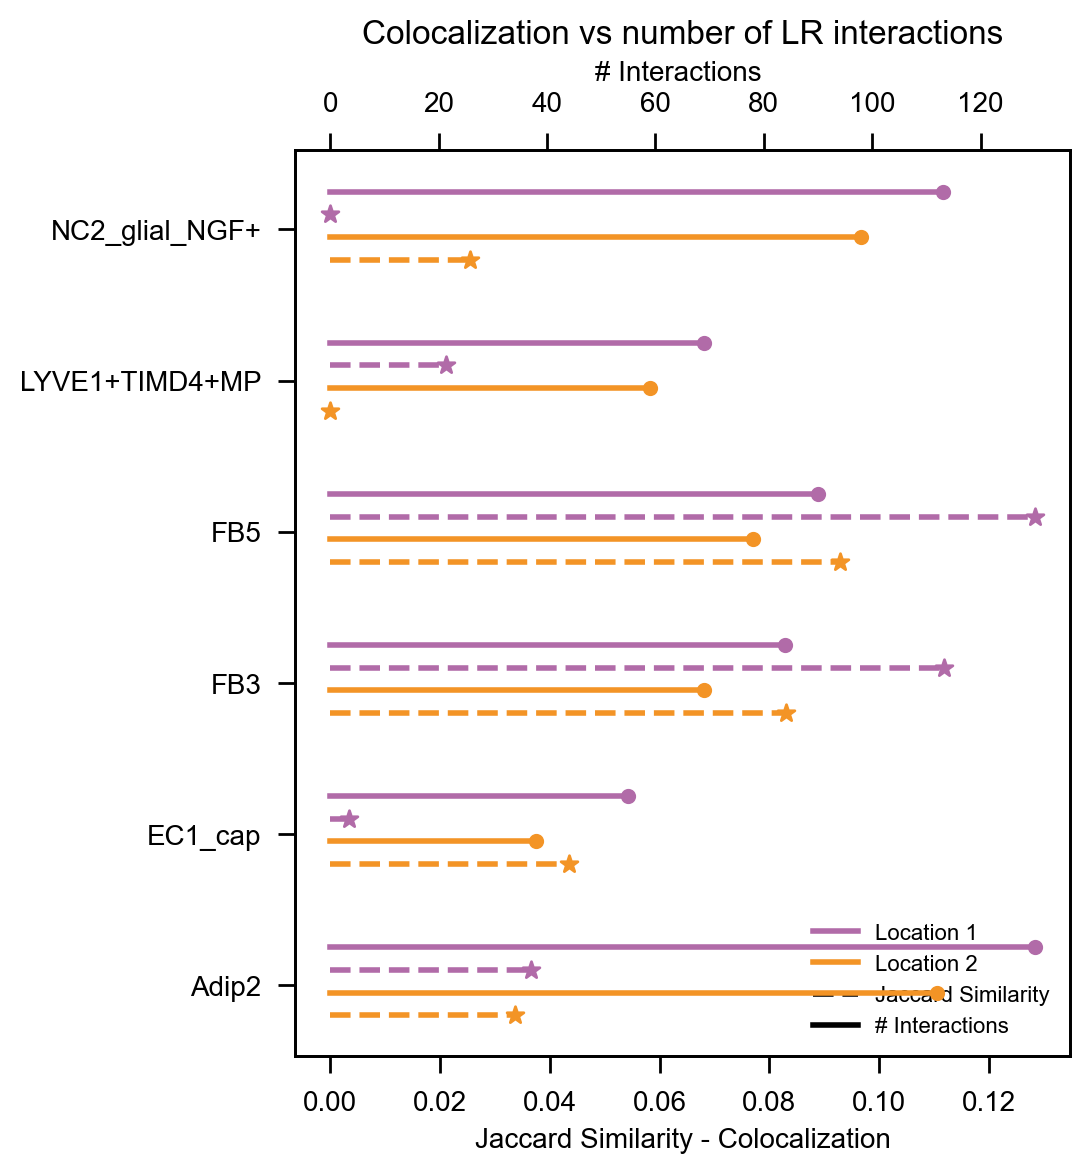

In [17]:
data_cc_coloc_AVN = plot_CCCvsColoc(closest_cells_df, l, subset)


# SAN

In [18]:
# Run LIANA
patient = patients[1]
counts_file_path = global_path + 'Data/Heart/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
meta_file_path = global_path + 'Data/Heart/Input_CP/'+patient+'_metadata_cancer_region_ass.tsv'
list_loc = cells[1]
l = run_LIANA(counts_file_path, list_loc, 'celltype_loc')


Using `.X`!
4465 features of mat are empty, they will be removed.
Using resource `consensus`.
0.07 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 6597 samples and 28267 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 100/100 [00:02<00:00, 47.97it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 100/100 [00:14<00:00,  6.72it/s]
/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
cytospace_folder = global_path + 'Results/Heart/CytoSPACE/'+patient+'/'
spots_loc1, spots_loc2 = select_regional_spots(cytospace_folder, counts_file_path, list_loc)
closest_cells_df = compute_colocalization(cytospace_folder, 'FB4_activated', spots_loc1, spots_loc2)


In [20]:
subset = ['NC2_glial_NGF+', 'Adip2',  'B',  'Mast', 'FB2', 'FB3', 'ILC', 'CD14+Mo']
set(subset).difference(set(l.cell))

set()

/aloy/home/epareja/2022/single_cell/paper_folders/Functions/downstream_analysis.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


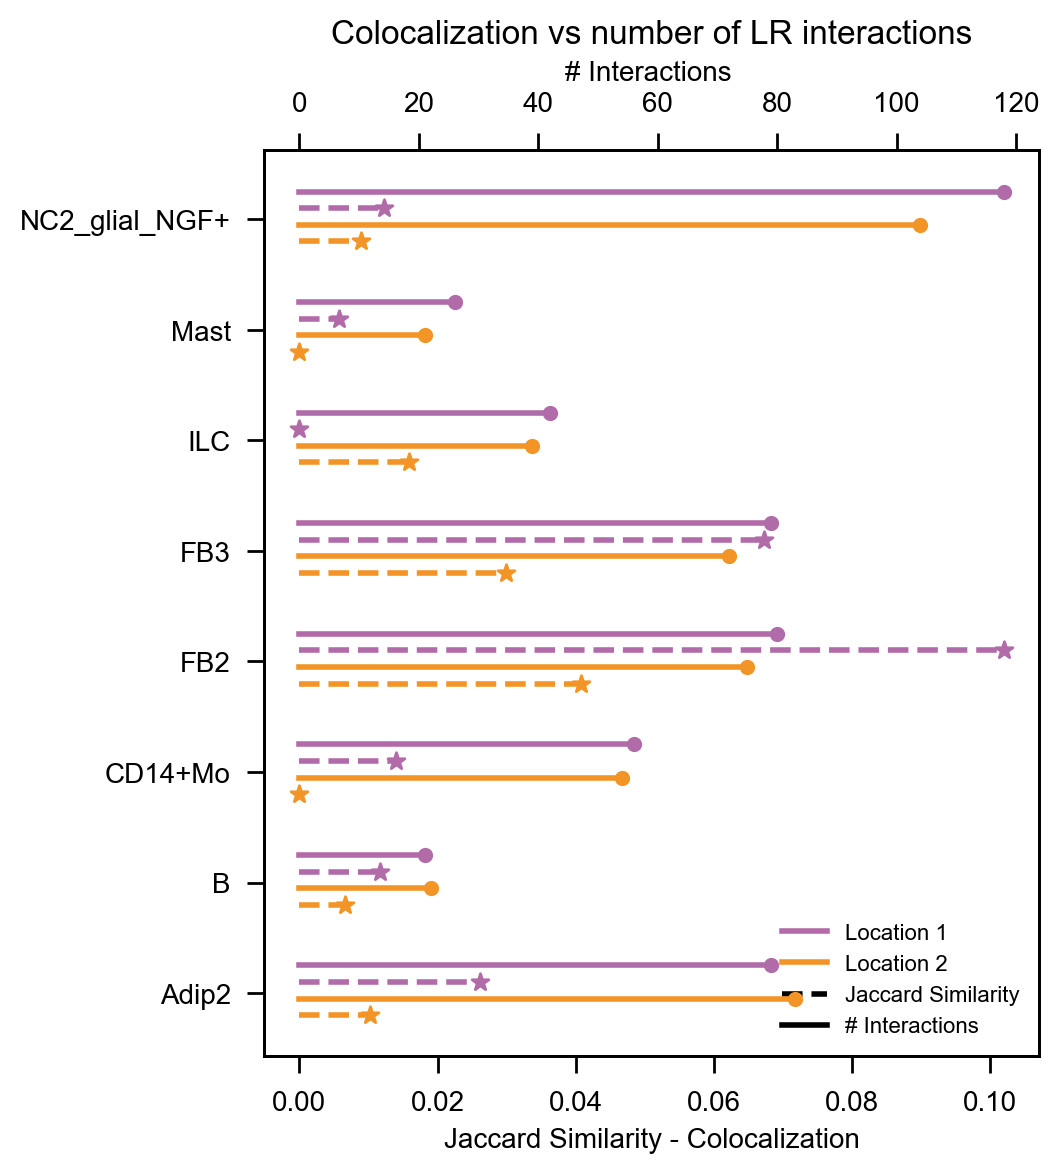

In [21]:
data_cc_coloc_SAN = plot_CCCvsColoc(closest_cells_df, l, subset)


# GRID

In [43]:


def fig_CCvscoloc (ax, data, title = 'Colocalization vs number of LR interactions', loc_legend = 'lower right', label = ['Location 1', 'Location 2']):
# Plot the jaccard similarities as horizontal lolliplots
    for i, row in data.iterrows():

        ax.plot([0, row['JS_loc2']], [i, i], color='#F39426', lw=2, ls = '--', zorder=10)
        ax.scatter([row['JS_loc2']], [i], color='#F39426', s=40, marker='*', zorder=10)

        ax.plot([0, row['JS_loc1']], [i + 0.3, i + 0.3], color='#B16BA8', lw=2, ls = '--', zorder=10)
        ax.scatter([row['JS_loc1']], [i + 0.3], color='#B16BA8', s=40,  marker='*', zorder=10)
        
    # Create a second x-axis to represent the interactions with cancer cells
    ax2 = ax.twiny() 

    # Plot the number of significant LR interctions as horizontal lolliplots
    for i, row in data.iterrows():
        ax2.plot([0, row['Cancer_loc2']], [i + 0.15, i + 0.15], color='#F39426', lw=2, zorder=10)
        ax2.scatter([row['Cancer_loc2']], [i + 0.15], color='#F39426', s=20, zorder=10)

        ax2.plot([0, row['Cancer_loc1']], [i + 0.45, i + 0.45], color='#B16BA8', lw=2, zorder=10)
        ax2.scatter([row['Cancer_loc1']], [i + 0.45], color='#B16BA8', s=20, zorder=10)
        

    ax.set_yticks(np.array((range(len(data['cells'])))) + 0.2, data['cells'], fontsize = labelout_size)


    ax.set_xlabel('Jaccard Similarity - Colocalization',  fontsize=labelout_size)
    ax2.set_xlabel('# Interactions with cancer cells ',  fontsize=labelout_size)

    ax.tick_params(axis='both', labelsize=labelout_size)



    legend_elements = [
        Line2D([0], [0], color='#B16BA8', lw=2, label=label[0]),
        Line2D([0], [0], color='#F39426', lw=2, label=label[1]),
        Line2D([0], [0], color='black', lw=2, ls='--', label='Jaccard Similarity'),
        Line2D([0], [0], color='black', lw=2, label='# Interactions')
    ]
    ax.legend(handles=legend_elements, fontsize=label_size, frameon = False, loc = loc_legend, bbox_to_anchor=(1, 0.2))
    ax.set_title(title, fontsize=title_size, y = 1.12)


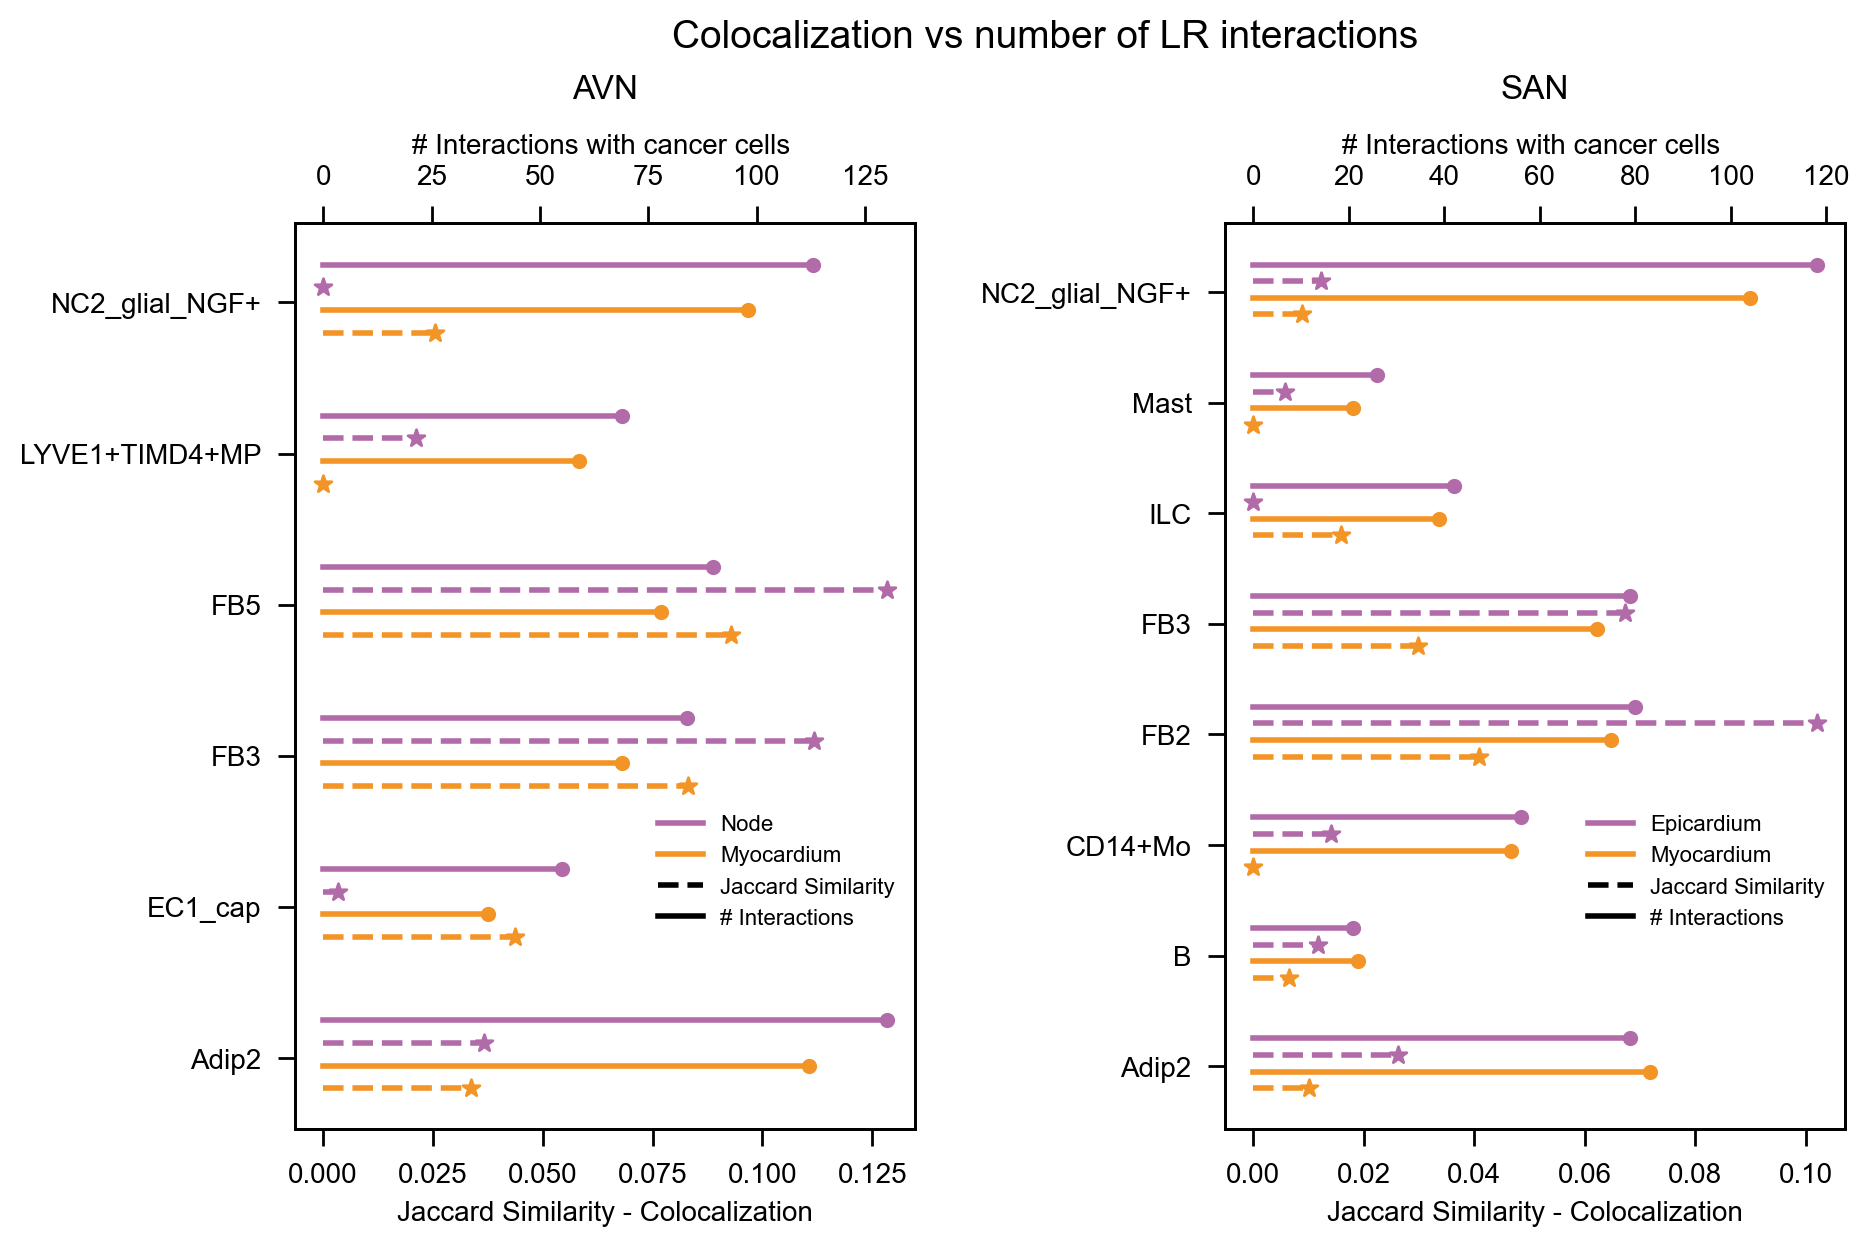

In [45]:
# Create the plot
fig, ax = plt.subplots(1,2, figsize=(10, 6), dpi=200)
plt.subplots_adjust(wspace=0.5)
ax = ax.flatten()

fig_CCvscoloc(ax[0], data_cc_coloc_AVN, title = 'AVN', loc_legend = 'lower right', label = ['Node', 'Myocardium'])
fig_CCvscoloc(ax[1], data_cc_coloc_SAN, title = 'SAN', loc_legend = 'lower right', label = ['Epicardium', 'Myocardium'])

fig.suptitle('Colocalization vs number of LR interactions', fontsize=title_size+2, y = 1.05)


plt.savefig(global_path+'LIANA_heart.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path+'LIANA_heart.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')